<a href="https://colab.research.google.com/github/wachira-samuel/Data-Science-Project/blob/main/Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
!unzip /content/sample_data/archive.zip

Archive:  /content/sample_data/archive.zip
  inflating: 1. Weather Data.csv     


**Importing Libraries**

You all need to import several libraries to facilitate data manipulation, visualization and analysis.

Below are some commonly used libraries for EDA in Python

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("1. Weather Data.csv")

In [ ]:
data.head()


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [ ]:
data.tail()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow
8783,12/31/2012 23:00,0.0,-2.1,86,30,11.3,99.89,Snow


In [ ]:
data.shape

(8784, 8)

# **Steps in Data cleaning**

1. **Identify and remove duplicates**

This ensures data integrity and accuracy in any data analysis or machine learning project.

In [ ]:
#Assuming 'data' is your dataframe
import pandas as pd
duplicates =data[data.duplicated()]
duplicates

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather


**2. Identify missing values in the data**

Dealing with missing values is a crucial aspect of data cleaning and preprocessing, as missing data can lead to biased analysis and inaccurate values

In [ ]:
import pandas as pd
missing_values= data.isnull().sum()
missing_values

,0
Date/Time,0
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,0


**3. Addressing outliers by either removing or transforming them.**

a. Removing outliers;

This invloves eliminating data points that are considered outliers from the dataset.

In [ ]:
# Convert relevant columns to numeric type if they are not already
# Filter outliers using interquartile range method

import pandas as pd

for col in data.columns:
    if data[col].dtype == 'object':
        try:
            data[col] = pd.to_numeric(data[col], errors='coerce')
            print(f"Converted column '{col}' to numeric.")
        except:
            print(f"Could not convert column '{col}' to numeric. It might not contain numerical data.")

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1


outliers = data[((data > (Q3 + 1.5 * IQR)) | (data < (Q1 - 1.5 * IQR))).any(axis=1)]

outliers

Converted column 'Date/Time' to numeric.
Converted column 'Weather' to numeric.


,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,NaN,-1.8,-3.9,86,4,8.0,101.24,NaN
1,NaN,-1.8,-3.7,87,4,8.0,101.24,NaN
2,NaN,-1.8,-3.4,89,7,4.0,101.26,NaN
3,NaN,-1.5,-3.2,88,6,4.0,101.27,NaN
4,NaN,-1.5,-3.3,88,7,4.8,101.23,NaN
...,...,...,...,...,...,...,...,...
8779,NaN,0.1,-2.7,81,30,9.7,100.13,NaN
8780,NaN,0.2,-2.4,83,24,9.7,100.03,NaN
8781,NaN,-0.5,-1.5,93,28,4.8,99.95,NaN
8782,NaN,-0.2,-1.8,89,28,9.7,99.91,NaN


**b.Transforming outliers**

Instead of removing outliers, transform the data to reduce the impat of outliers on the analysis.

common transformation tecniques include log transformation, square root transformation, or Box-cox transformation

In [ ]:
# Assuming data is your dataframe
# Log transformation
# Square root transformation
# Box-cox Transformation
# Handle potential non-positive values and maintain the same index



import numpy as np
import pandas as pd
from scipy import stats


data['Temp_Log'] = np.log(data['Temp_C'])


data['Temp_Sqrt'] = np.sqrt(data['Temp_C'])


data['Temp_Boxcox'] = np.nan
positive_temp = data['Temp_C'][data['Temp_C'] > 0]
if not positive_temp.empty:
    data.loc[positive_temp.index, 'Temp_Boxcox'], _ = stats.boxcox(positive_temp)
else:
    print("Warning: No positive values in 'Temp_C' for Box-Cox transformation.")

**4.Remove irrelevant data**

This invloves remove irrelevant data that is not usefule or applicable to the analysis, either due to data entry errors or because it does not align with the analysis objectives.



In [ ]:
import pandas as pd
data=data.drop(columns=['Temp_Log','Temp_Sqrt','Temp_Boxcox'])
data

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,NaN,-1.8,-3.9,86,4,8.0,101.24,NaN
1,NaN,-1.8,-3.7,87,4,8.0,101.24,NaN
2,NaN,-1.8,-3.4,89,7,4.0,101.26,NaN
3,NaN,-1.5,-3.2,88,6,4.0,101.27,NaN
4,NaN,-1.5,-3.3,88,7,4.8,101.23,NaN
...,...,...,...,...,...,...,...,...
8779,NaN,0.1,-2.7,81,30,9.7,100.13,NaN
8780,NaN,0.2,-2.4,83,24,9.7,100.03,NaN
8781,NaN,-0.5,-1.5,93,28,4.8,99.95,NaN
8782,NaN,-0.2,-1.8,89,28,9.7,99.91,NaN


**5. Deal with any invalid or inconsistent data**

Invalid data refers to information that does not conform to the expected format or valid range, while inconsistent data refers to conflicting entries within the dataset



In [ ]:
import pandas as pd
data.describe()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,0.0,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,0.0
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN
max,NaN,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000,NaN


In [ ]:
# Range checks for numeric columns
import pandas as pd

numeric_columns = data.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        if data[col].min() <= 0:
            print(f"Warning:  Column '{col}' contains negative values.")
            data.loc[data[col] <= 0, col] =0


In [ ]:
# Removing negative values
data_cleaned=data.drop(columns=['Temp_C','Dew Point Temp_C','Wind Speed_km/h'])
data_cleaned

,Date/Time,Rel Hum_%,Visibility_km,Press_kPa,Weather
0,NaN,86,8.0,101.24,NaN
1,NaN,87,8.0,101.24,NaN
2,NaN,89,4.0,101.26,NaN
3,NaN,88,4.0,101.27,NaN
4,NaN,88,4.8,101.23,NaN
...,...,...,...,...,...
8779,NaN,81,9.7,100.13,NaN
8780,NaN,83,9.7,100.03,NaN
8781,NaN,93,4.8,99.95,NaN
8782,NaN,89,9.7,99.91,NaN


In [ ]:
data.isnull().sum()

,0
Date/Time,8784
Temp_C,0
Dew Point Temp_C,0
Rel Hum_%,0
Wind Speed_km/h,0
Visibility_km,0
Press_kPa,0
Weather,8784


# Data Exploration

The common EDA techniques include the use of summary statistics, visualization and  correlation metrices.

**1. calculate summary statistics**

a. Mean: Also known as average, is calculated by summing  all the values in the datsets and dividing th by the number of data points.

In [ ]:
# Mean in both DataFrame and  NumPy Array
import pandas as pd
import numpy as np


mean= data_cleaned.mean()

mean_array = np.mean(data_cleaned)

print("Mean in DataFrame:")
print(mean)

print("\nMean in NumPy Array:")
print(mean_array)

Mean in DataFrame:
Date/Time               NaN
Rel Hum_%         67.431694
Visibility_km     27.664447
Press_kPa        101.051623
Weather                 NaN
dtype: float64

Mean in NumPy Array:
65.38258803885853


**b. Median:** This is the middle value in dataset when arranged in ascending order

In [ ]:
median=data_cleaned.median()
median

median_array=np.median(data_cleaned)
median_array



nan

**Mode**: This is the value that appears most frequently in a dataset

In [ ]:
from scipy import stats
mode=stats.mode(data_cleaned)
mode

ModeResult(mode=array([   nan,  68.  ,  25.  , 101.13,    nan]), count=array([8784.,  210., 3324.,   69., 8784.]))

**2. Visualize the data using graphs, charts and histograms**

This will help to identify any patterns or anomalies in the data.

a. Scatter plot

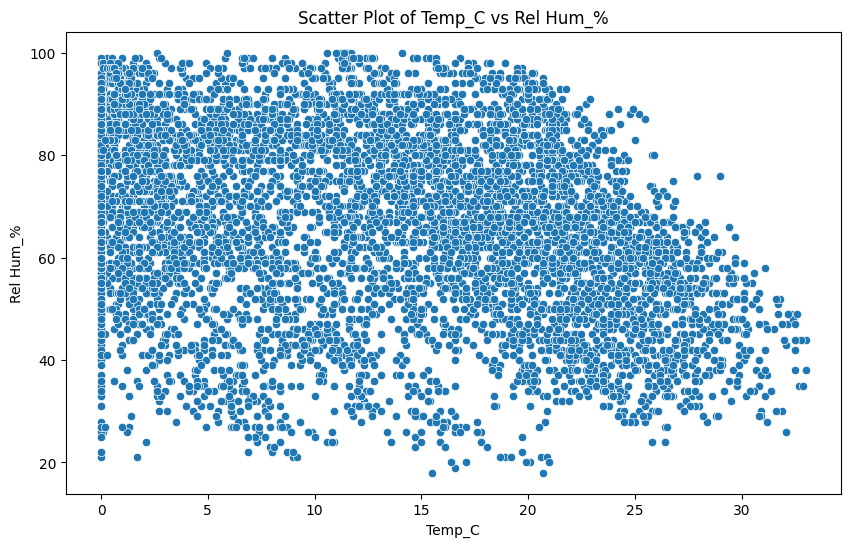

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.scatterplot(data=data,x='Temp_C', y='Rel Hum_%')
plt.title('Scatter Plot of Temp_C vs Rel Hum_%')
plt.xlabel('Temp_C')
plt.ylabel('Rel Hum_%')
plt.show()



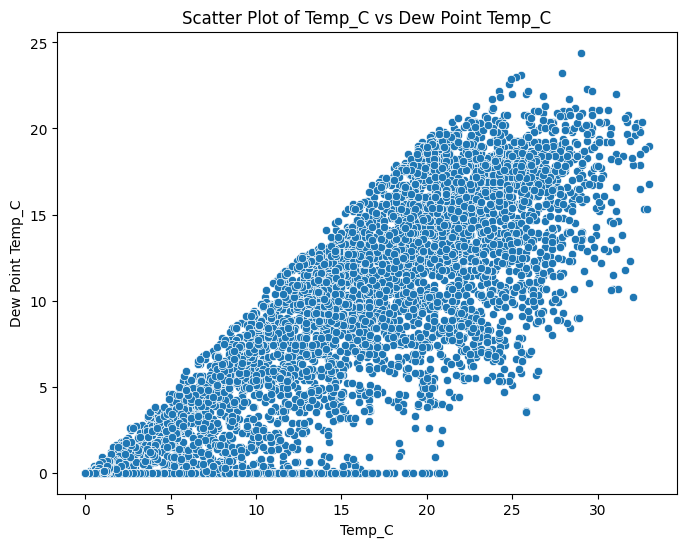

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data,x='Temp_C', y='Dew Point Temp_C')
plt.title('Scatter Plot of Temp_C vs Dew Point Temp_C')
plt.xlabel('Temp_C')
plt.ylabel('Dew Point Temp_C')
plt.show()


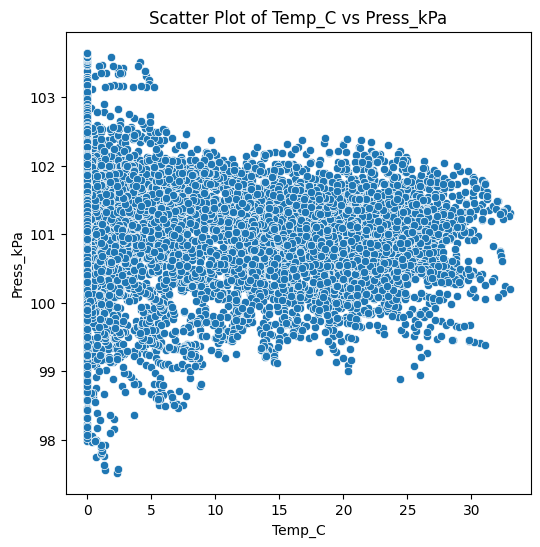

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(data=data,x='Temp_C', y='Press_kPa')
plt.title('Scatter Plot of Temp_C vs Press_kPa')
plt.xlabel('Temp_C')
plt.ylabel('Press_kPa')
plt.show()

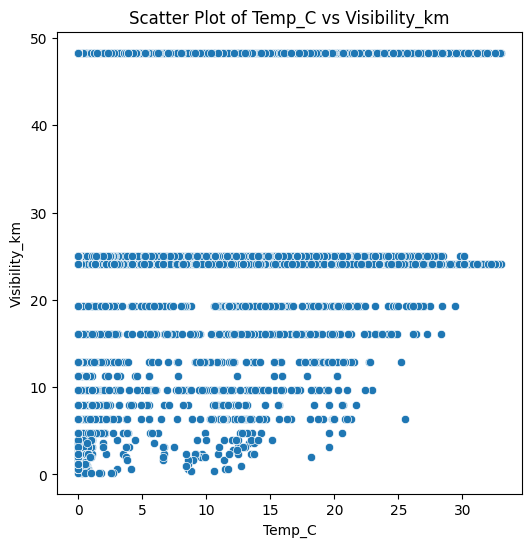

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(data=data,x='Temp_C', y='Visibility_km')
plt.title('Scatter Plot of Temp_C vs Visibility_km')
plt.xlabel('Temp_C')
plt.ylabel('Visibility_km')
plt.show()

**b. Line chart**

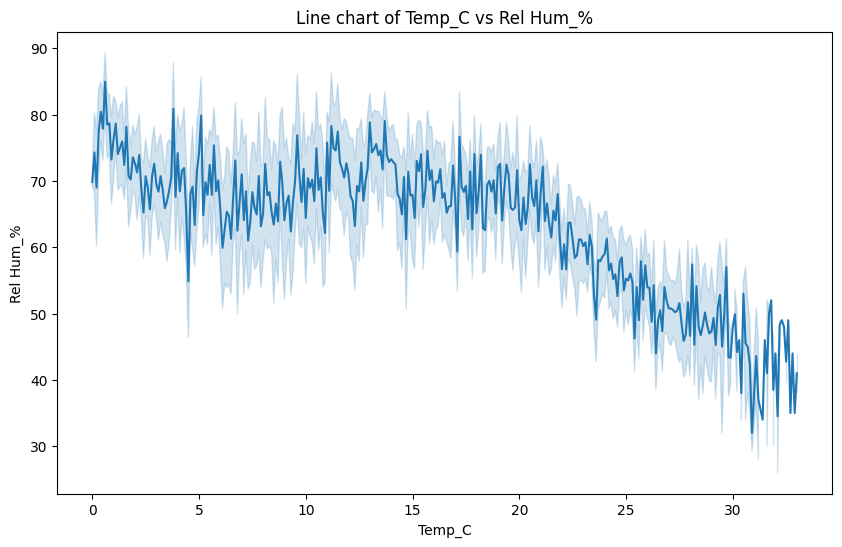

In [ ]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Temp_C', y='Rel Hum_%')
plt.title('Line chart of Temp_C vs Rel Hum_%')
plt.xlabel('Temp_C')
plt.ylabel('Rel Hum_%')
plt.show()


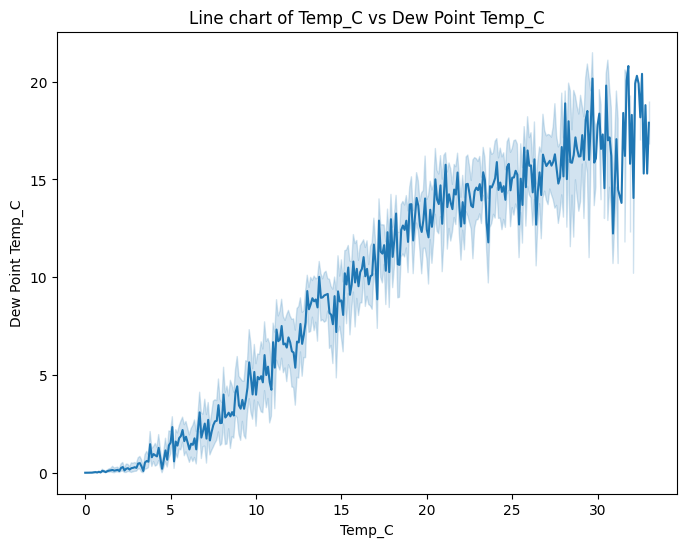

In [ ]:

plt.figure(figsize=(8,6))
sns.lineplot(data=data, x='Temp_C', y='Dew Point Temp_C')
plt.title('Line chart of Temp_C vs Dew Point Temp_C')
plt.xlabel('Temp_C')
plt.ylabel('Dew Point Temp_C')
plt.show()


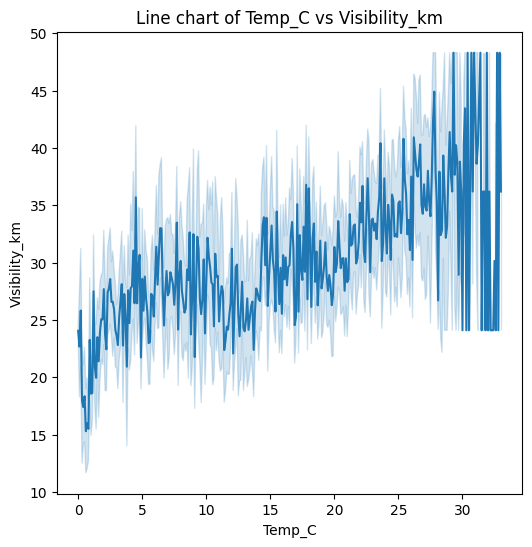

In [ ]:

plt.figure(figsize=(6,6))
sns.lineplot(data=data, x='Temp_C', y='Visibility_km')
plt.title('Line chart of Temp_C vs Visibility_km')
plt.xlabel('Temp_C')
plt.ylabel('Visibility_km')
plt.show()

**Histogram**

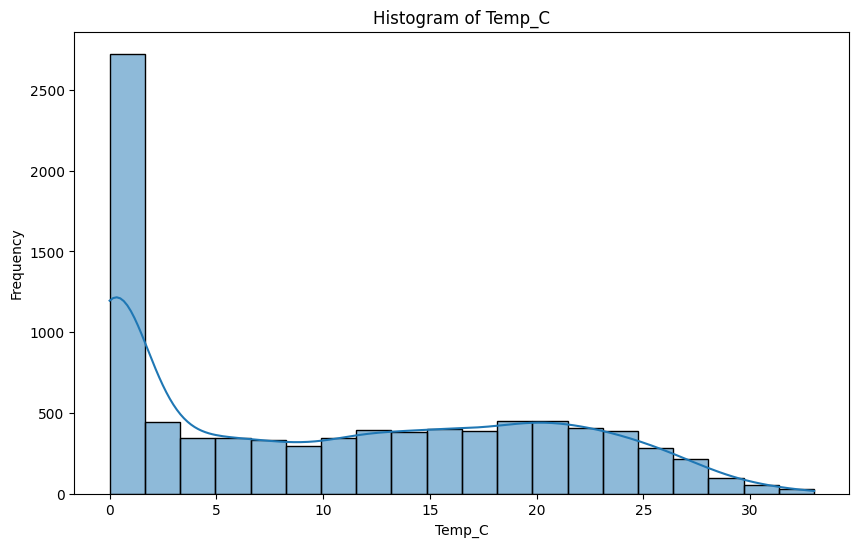

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Temp_C', bins=20, kde=True)
plt.title('Histogram of Temp_C')
plt.xlabel('Temp_C')
plt.ylabel('Frequency')
plt.show()


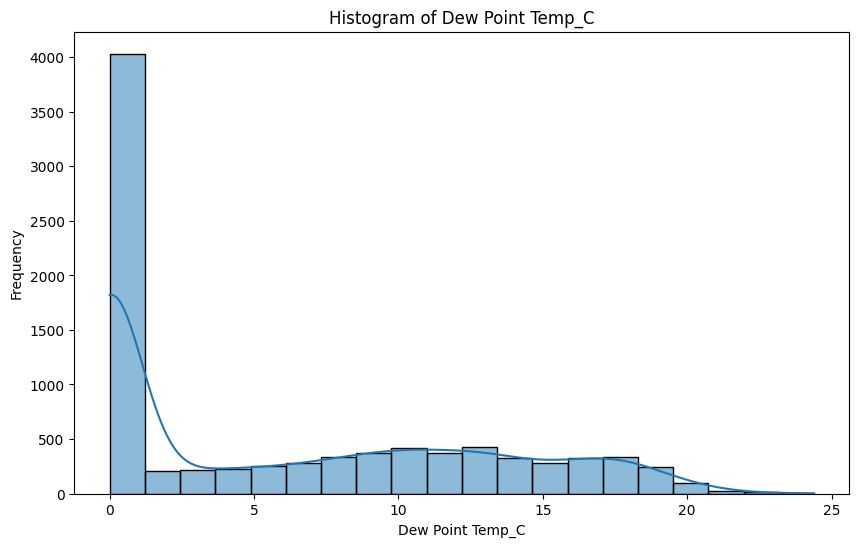

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Dew Point Temp_C', bins=20, kde=True)
plt.title('Histogram of Dew Point Temp_C')
plt.xlabel('Dew Point Temp_C')
plt.ylabel('Frequency')
plt.show()

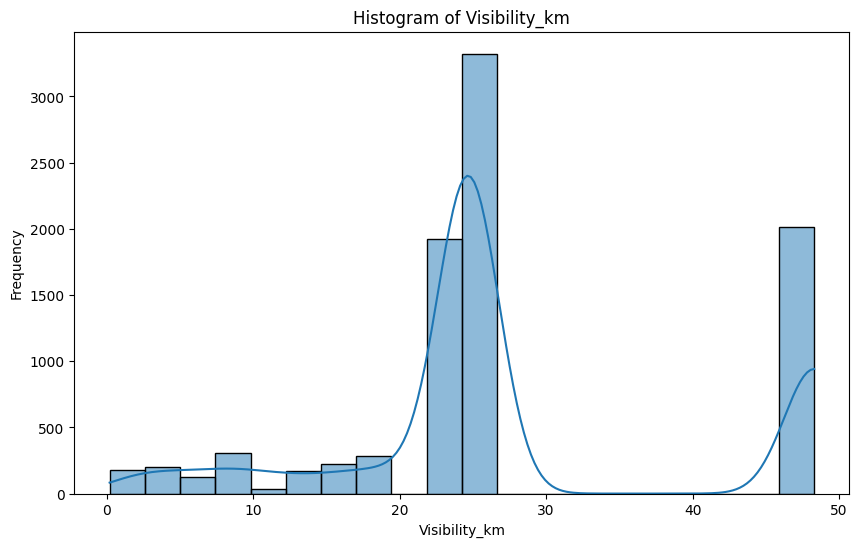

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Visibility_km', bins=20, kde=True)
plt.title('Histogram of Visibility_km')
plt.xlabel('Visibility_km')
plt.ylabel('Frequency')
plt.show()

**d. Box Plot**

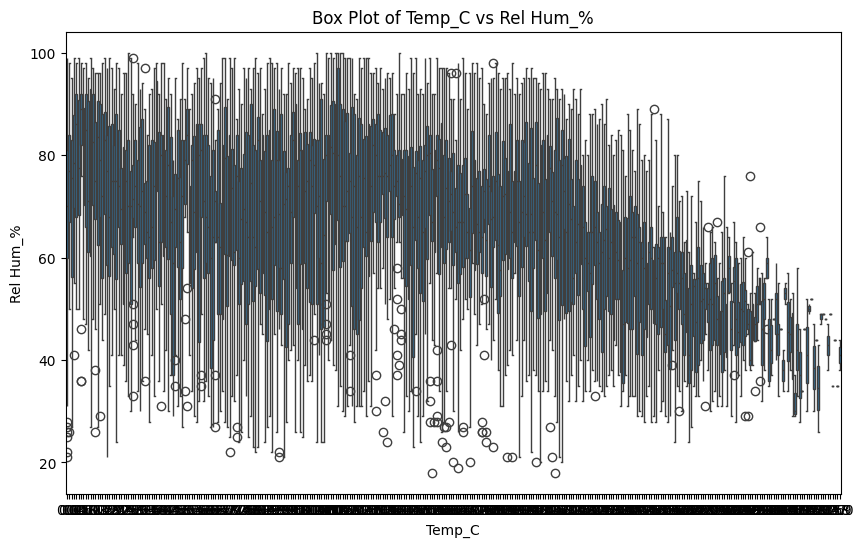

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Temp_C', y='Rel Hum_%')
plt.title('Box Plot of Temp_C vs Rel Hum_%')
plt.xlabel('Temp_C')
plt.ylabel('Rel Hum_%')
plt.show()

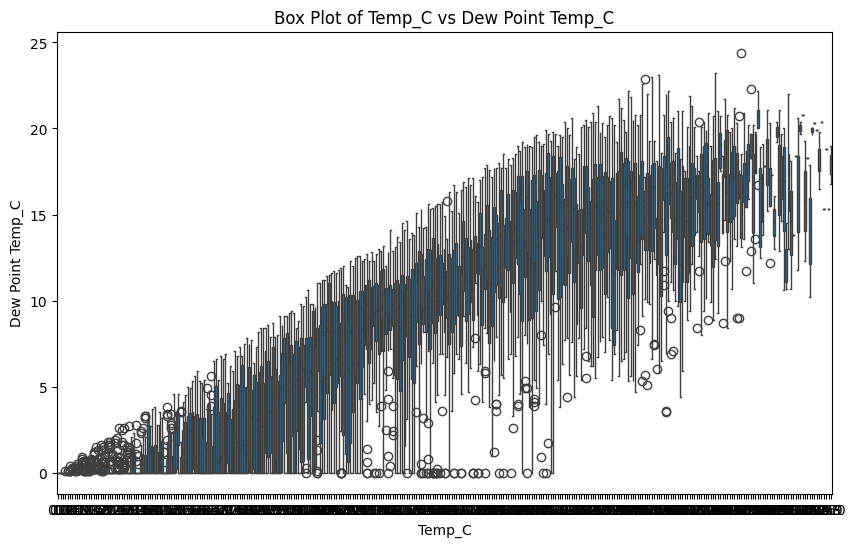

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Temp_C', y='Dew Point Temp_C')
plt.title('Box Plot of Temp_C vs Dew Point Temp_C')
plt.xlabel('Temp_C')
plt.ylabel('Dew Point Temp_C')
plt.show()

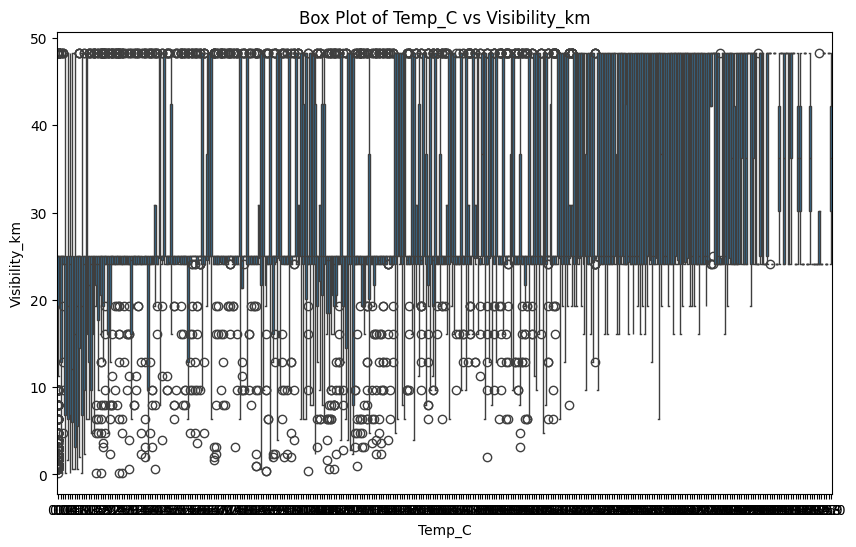

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Temp_C', y='Visibility_km')
plt.title('Box Plot of Temp_C vs Visibility_km')
plt.xlabel('Temp_C')
plt.ylabel('Visibility_km')
plt.show()


**3. Examine the correlations between variables using correlation matrices**

A correlation matrix is atable that displays the correlation coefficients between all pairs of numeric variables in the dataset.

correlation coefficient quantify the strength and direction of the linear relationship between two variables.

Values ranges from -1 to 1, where -1 indicates a perfect negative correlation, 0 indicates no linear correlation and 1 indicates a perfect positive correlation.

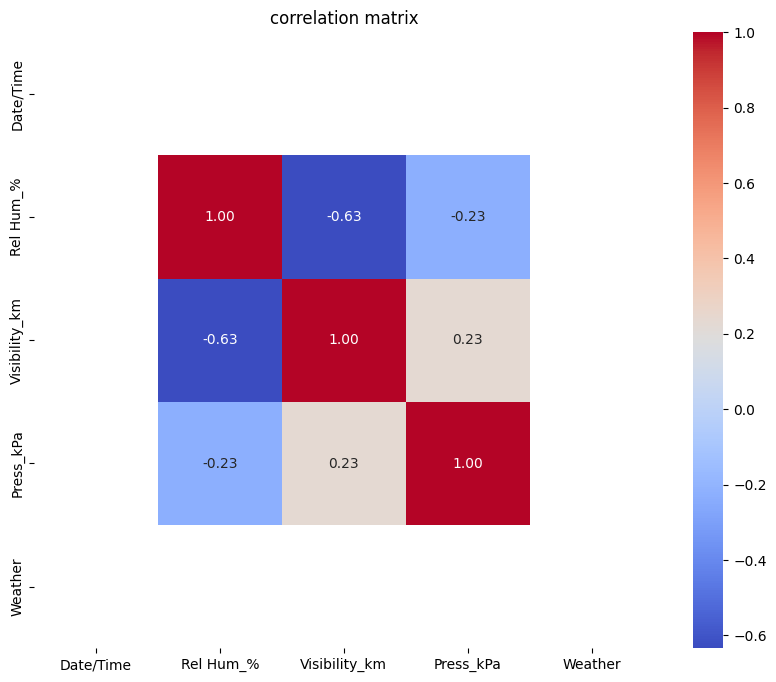

In [ ]:
## calculate the correlation matrix and  create a heatmap for correlation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = data_cleaned.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('correlation matrix')
plt.show()